# Take Home Quiz 1

---

This homework should be submitted **by LT** on ALICE.

## Libraries

---

Do <b>NOT</b> import any other libraries aside from those below.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

## Part 1. Combinations of Functions

---

For a more detailed discussion on combinations of functions, see [`Paul's Online Notes`](http://tutorial.math.lamar.edu/Classes/Alg/CombineFunctions.aspx).

Let the following: 

- $f(x) = \sin(2\pi x)$ 


- $g(x) = \cos\left(\frac{x}{\pi}\right)$

### Preliminaries

---

#### Q. Create a numpy array (called `x`) of 1000 equally spaced numbers from -25 to 25.

In [119]:
x = np.linspace(-25, 25, 1000)

#### Q. Create two functions called `f(x)` and `g(x)` as defined above.

In [120]:
def f(x):
    return np.sin(2 * np.pi * x)

def g(x):
    return np.cos(x / np.pi)

#### Q. Plot both graphs of `f(x)` and `g(x)` simulteneously (i.e. on the same plot) as a <b><u>solid blue line</u></b> and <b><u>solid red line</u></b>, respectively.

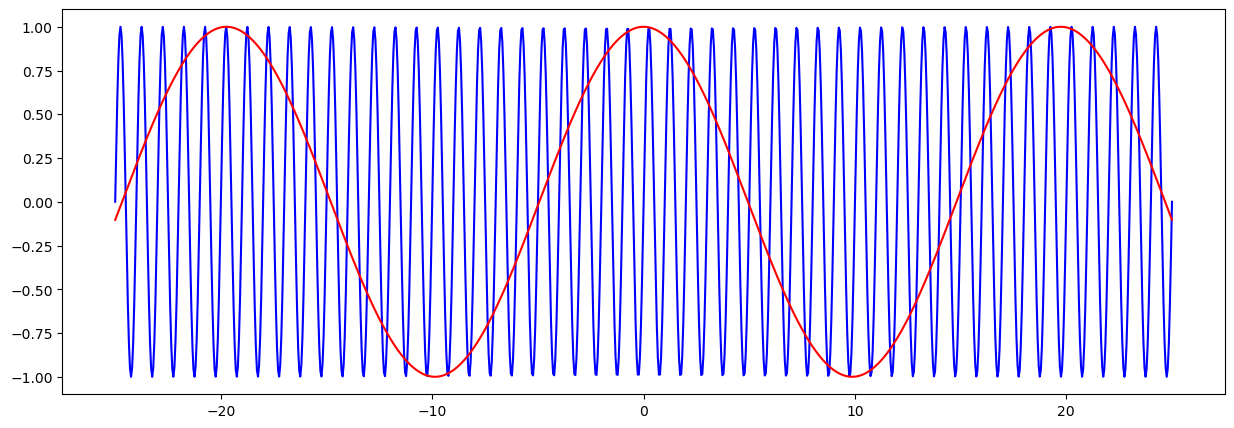

In [121]:
plt.plot(x, f(x), 'b-')
plt.plot(x, g(x), 'r-')
plt.show()

#### Q. Based on the resulting plot above, describe the differences between the two functions. Answer in 1 to 2 sentences.

Answer here.

### Sums of Functions

---

#### Q. Plot a graph of $f(x) + g(x)$ as a <b><u>solid blue line</u></b>.

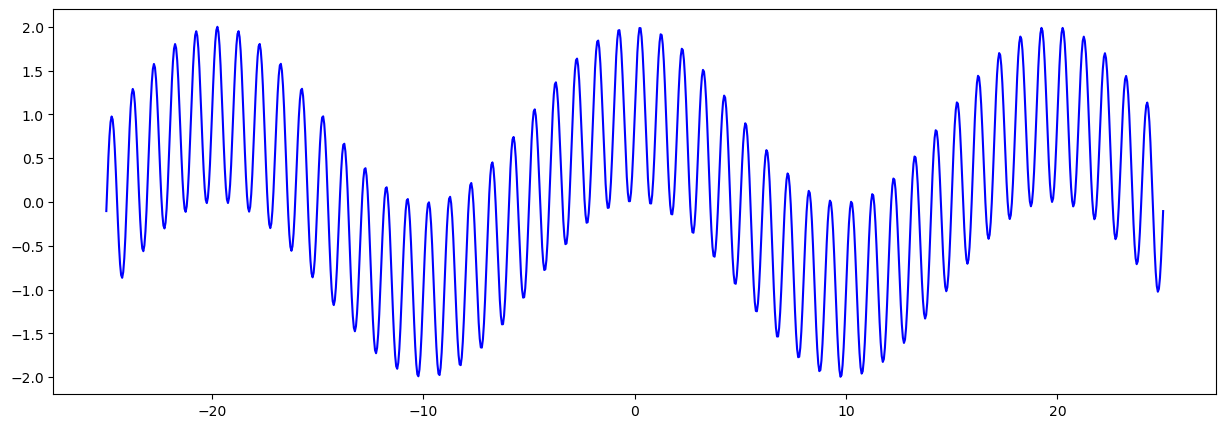

In [122]:
plt.plot(x, f(x) + g(x), 'b-')
plt.show()

#### Q. Describe how the two sinusoids interact when you add them. Answer in 1 to 2 sentences.

Answer here.

### Products of Functions

---

#### Q. Plot a graph of $f(x)g(x)$ as a <b><u>solid red line</u></b>. (1 pt.)

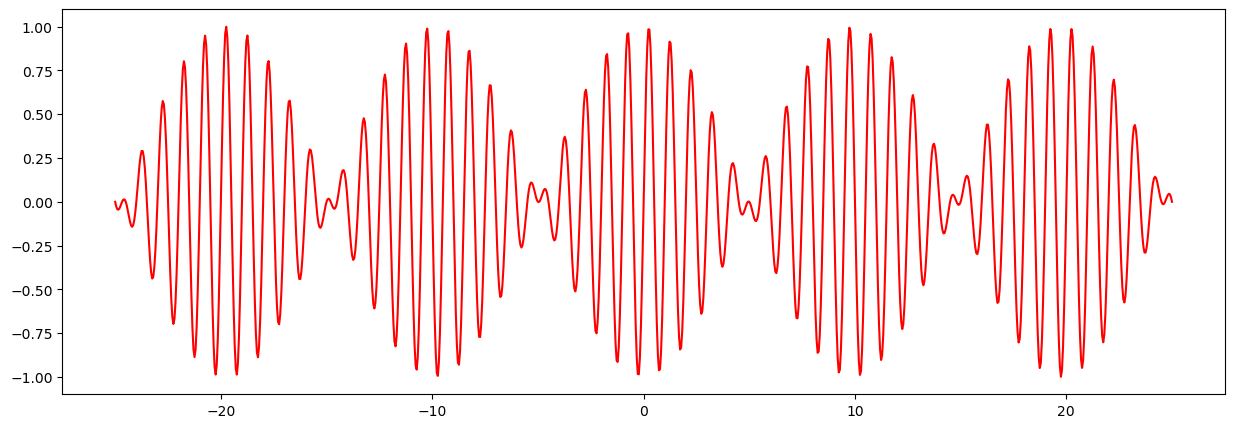

In [123]:
plt.plot(x, f(x) * g(x), 'r-')
plt.show()

#### Q. Describe how the two sinusoids interact when you multiply them. Answer in 1 to 2 sentences.

Answer here.

### Composite Functions

---

#### Q. Plot a graph of $f(g(x))$ as a <b><u>solid green line</u></b>.

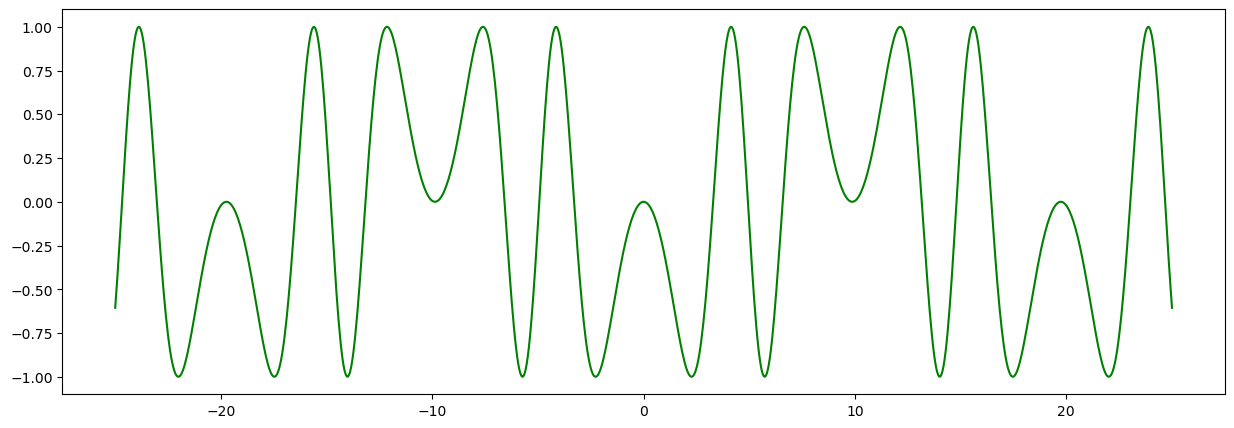

In [124]:
plt.plot(x, f(g(x)), 'g-')
plt.show()

#### Q. Describe how the two sinusoids interact they are composited in 1 to 2 sentences.

Answer here.

### An Additive Model with Trend

---

#### Q. Plot all three graphs simulteneously as <b><u>dashed lines</u></b> (keep the colors specified above).

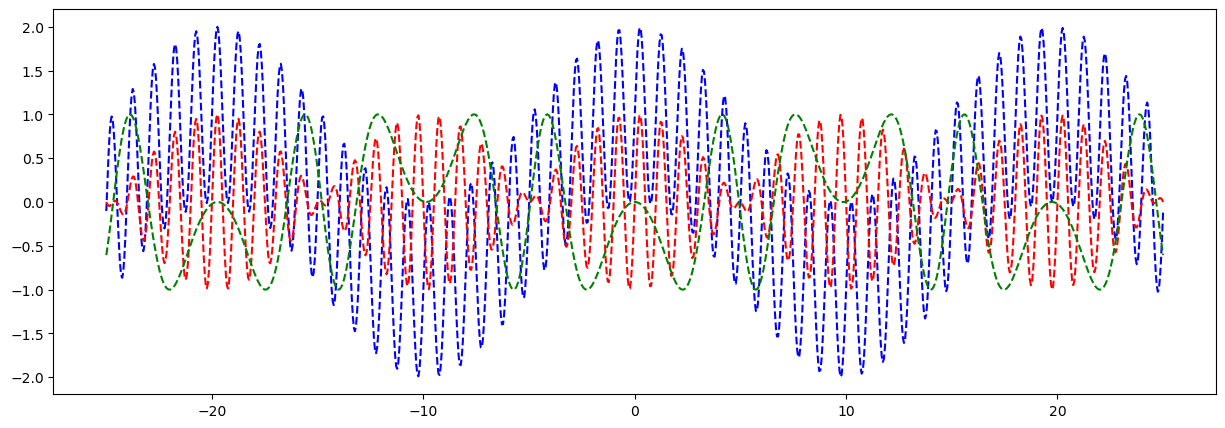

In [125]:
plt.plot(x, f(x)+g(x), 'b--')
plt.plot(x, f(x)*g(x), 'r--')
plt.plot(x, f(g(x)), 'g--')
plt.show()

#### Q. Let's try adding a positive linear trend. Plot a graph of $f(x) + g(x) + \frac{1}{8}x$ as a <b><u>solid green line</u></b>.

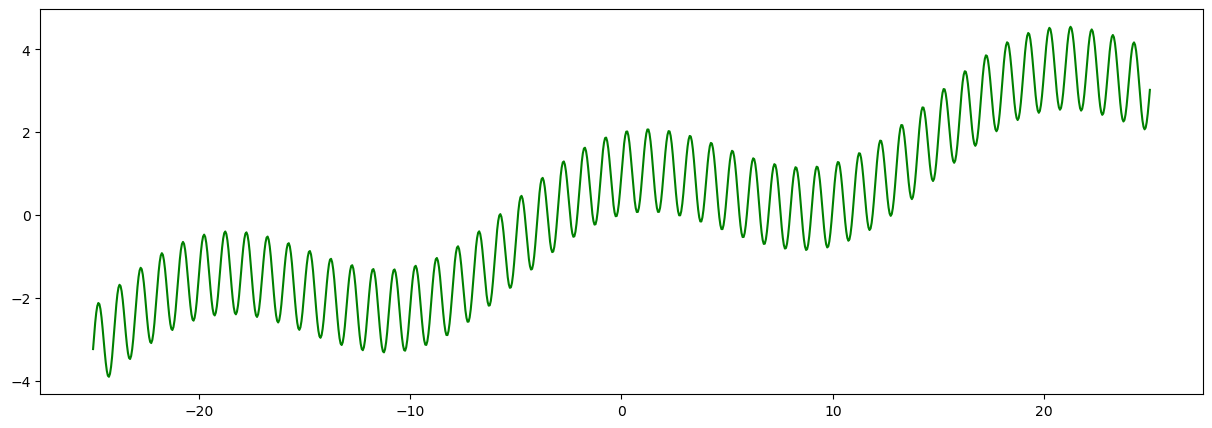

In [126]:
plt.plot(x, f(x) + g(x) + 1 / 8 * x, 'g-')
plt.show()

#### Q. What kinds of data could reasonably follow the function described above? Answer in 2 to 3 sentences.

Answer here.

## Part 2. Curve Fitting

---

For this sections, we will be using the following datasets: `fit_data1.csv`, `fit_data2.csv`, `fit_data3.csv`, `fit_data4.csv`.

### `fit_data1.csv`

---

#### Q. Load the `fit_data1.csv` dataset using pandas and print the dataframe.

In [127]:
fit_data1 = pd.read_csv('fit_data1.csv')
fit_data1

,x,y
0,0.000000,292.073549
1,0.707071,214.164335
2,1.414141,230.606929
3,2.121212,303.335048
4,2.828283,251.714122
...,...,...
95,67.171717,428.026119
96,67.878788,397.565071
97,68.585859,337.196256
98,69.292929,403.412667


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [153]:
x, y = fit_data1[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

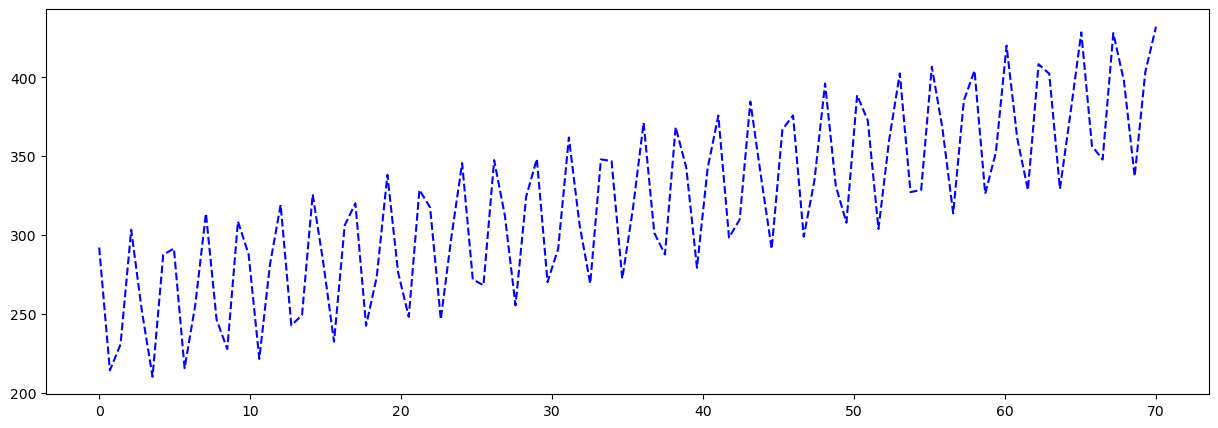

In [154]:
plt.plot(x, y, 'b--')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [155]:
def fit1(x, A, B, f, m, a):
    """Sinusoid + Line"""
    return a * np.sin(2 * np.pi * f * x + A) + m * x + B

popt, pcov = curve_fit(fit1, x, y)

SSR= np.sum((y - fit1(x, *popt)) ** 2)

print(f"Phase (A) = {popt[0]:.2f}")
print(f"Intercept (B) = {popt[1]:.2f}")
print(f"Frequency (f) = {popt[2]:.2f}")
print(f"Slope (m) = {popt[3]:.2f}")
print(f"Amplitude (a) = {popt[4]:.2f}")
print(f"SSR = {SSR:.2f}")

Phase (A) = 1.00
Intercept (B) = 250.00
Frequency (f) = 1.00
Slope (m) = 2.00
Amplitude (a) = 50.00
SSR = 0.00


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

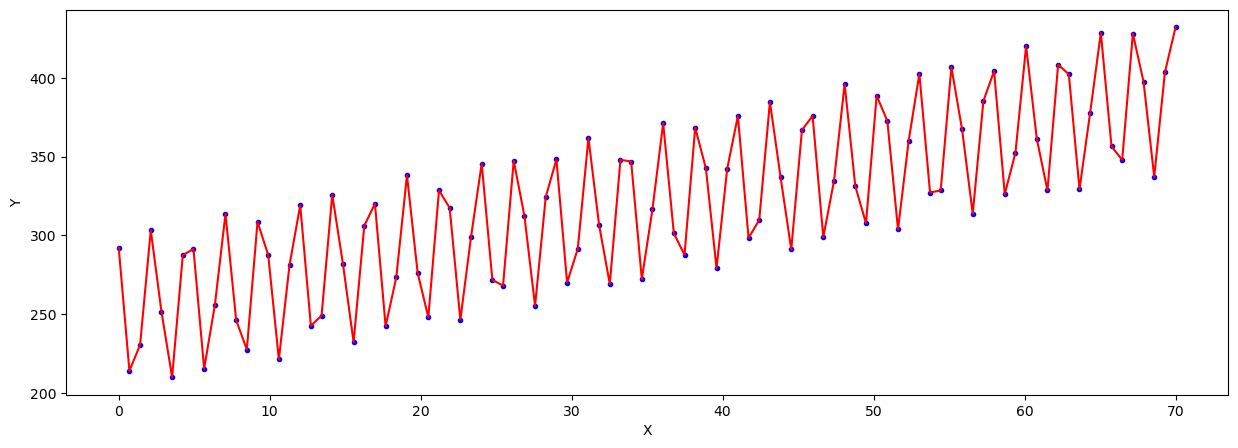

In [156]:
x_space = np.linspace(min(x),max(x),1000)
plt.plot(x, y, 'b.')
plt.plot(x, fit1(x, *popt), 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### `fit_data2.csv`

---

#### Q. Load the `fit_data2.csv` dataset using pandas and print the dataframe.

In [180]:
fit_data2 = pd.read_csv('fit_data2.csv')
fit_data2

,x,y
0,0.000000,0.000000
1,0.008008,0.007944
2,0.016016,0.015762
3,0.024024,0.023454
4,0.032032,0.031022
...,...,...
995,7.967968,0.002760
996,7.975976,0.002741
997,7.983984,0.002722
998,7.991992,0.002703


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [181]:
x, y = fit_data2[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

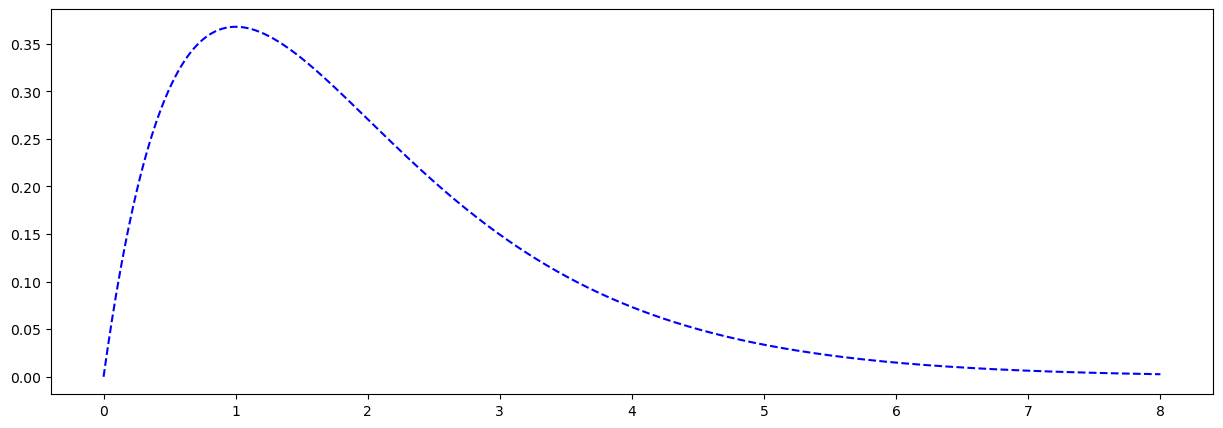

In [182]:
plt.plot(x, y, 'b--')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [193]:
def fit2(x, a, b, c, A, B):
    """Quadratic * Exponential"""
    return (a * x ** 2 + b * x + c) * A * np.exp(-B * x)

popt, pcov = curve_fit(fit2, x, y)

SSR = np.sum((y - fit2(x, *popt))**2)


print(f"Coefficient A = {popt[0]: .2f}")
print(f"Coefficient B = {popt[1]: .2f}")
print(f"Coefficient C = {popt[2]: .2f}")
print(f"A = {popt[3]: .2f}")
print(f"Decay Rate (alpha) = {popt[4]: .2f}")
print(f"SSR = {SSR: .2f}")

Coefficient A =  0.00
Coefficient B =  3.61
Coefficient C =  0.00
A =  0.28
Decay Rate (alpha) =  1.00
SSR =  0.00


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

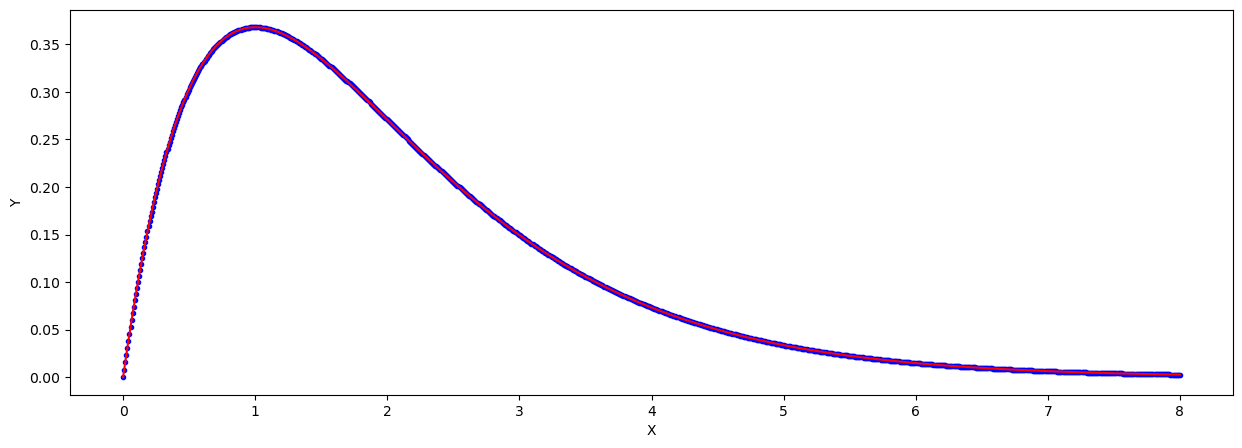

In [194]:
x_space = np.linspace(min(x),max(x),1000)
plt.plot(x, y, 'b.')
plt.plot(x_space, fit2(x_space, *popt), 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### `fit_data3.csv`

---

#### Q. Load the `fit_data3.csv` dataset using pandas and print the dataframe.

In [196]:
fit_data3 = pd.read_csv('fit_data3.csv')
fit_data3

,x,y
0,-12.566371,1.000000
1,-12.312505,0.470743
2,-12.058638,0.232564
3,-11.804772,0.126156
4,-11.550906,0.078146
...,...,...
95,11.550906,12.796559
96,11.804772,7.926702
97,12.058638,4.299893
98,12.312505,2.124303


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [197]:
x, y = fit_data3[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots) 

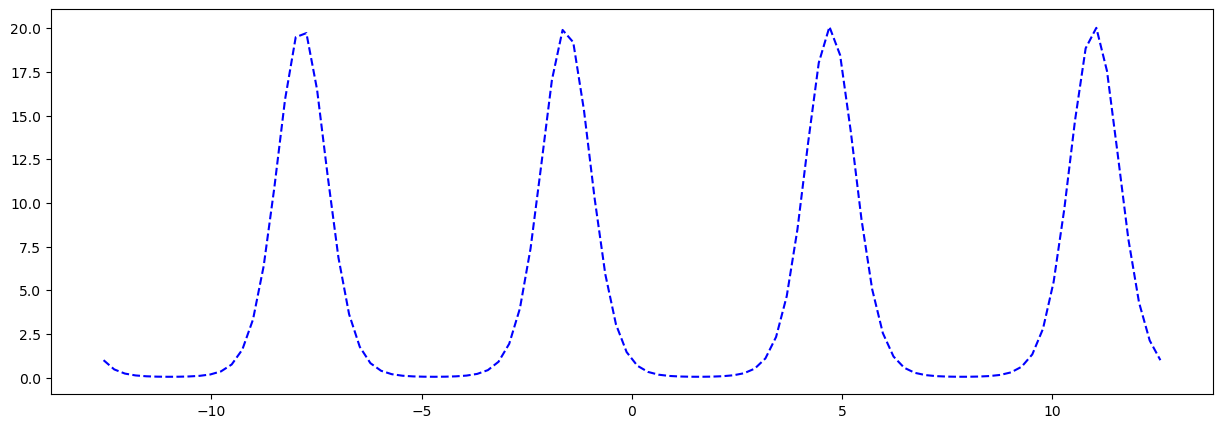

In [198]:
plt.plot(x, y, 'b--')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [203]:
def fit3(x, a, f, A, B, C):
    """Exponential Sinusoid"""
    return A * np.exp(a * np.sin(f * x + B) + C)

popt, pcov = curve_fit(fit3, x, y)

SSR = np.sum((y - fit3(x, *popt)) ** 2)

print(f"Amplitude (a) = {popt[0]:.2f}")
print(f"Frequency (f) = {popt[1]:.2f}")
print(f"Scale Factor (A) = {popt[2]:.2f}")
print(f"Phase Shift (B) = {popt[3]:.2f}")
print(f"Offset (C) = {popt[4]:.2f}")
print(f"SSR = {SSR:.2f}")

Amplitude (a) = 3.00
Frequency (f) = 1.00
Scale Factor (A) = 1.12
Phase Shift (B) = 3.14
Offset (C) = -0.11
SSR = 0.00


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

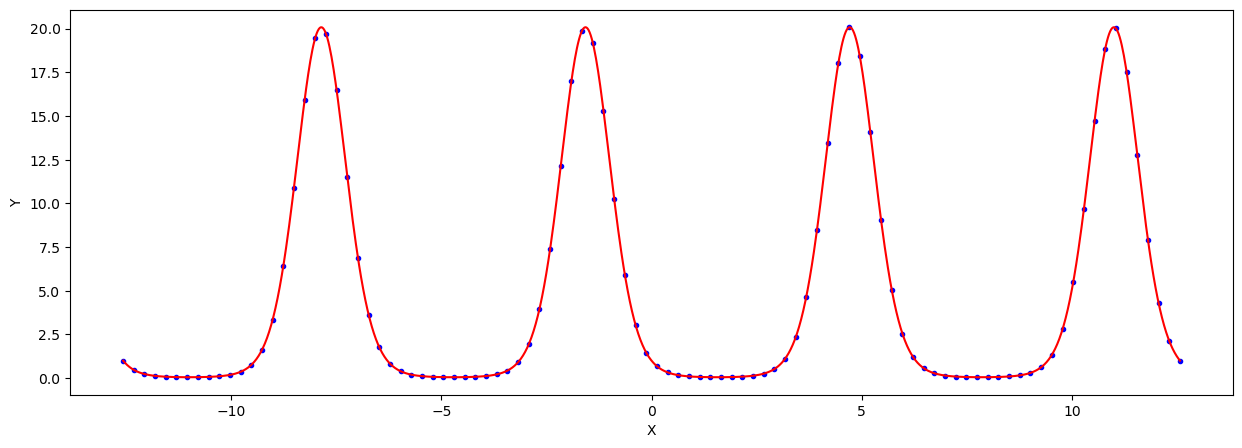

In [204]:
x_space = np.linspace(min(x),max(x),1000)
plt.plot(x, y, 'b.')
plt.plot(x_space, fit3(x_space, *popt), 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### `fit_data4.csv`

---

#### Q. Load the `fit_data4.csv` dataset using pandas and print the dataframe.

In [142]:
fit_data4 = pd.read_csv('fit_data4.csv')
fit_data4

,x,y
0,-5.00000,0.010799
1,-4.89899,0.005704
2,-4.79798,0.006033
3,-4.69697,0.059341
4,-4.59596,0.020562
...,...,...
95,4.59596,1.071575
96,4.69697,1.034006
97,4.79798,1.015753
98,4.89899,0.989731


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [163]:
x, y = fit_data4[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

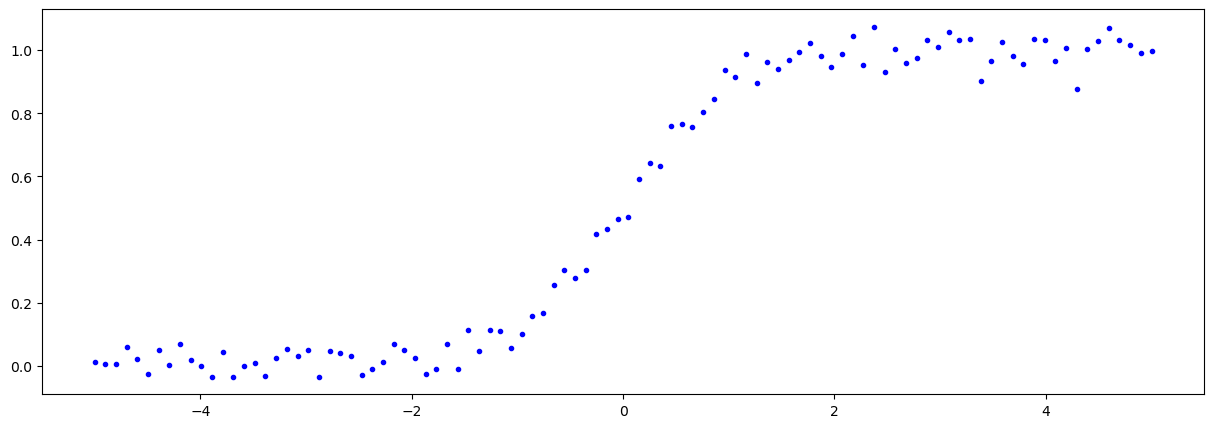

In [171]:
plt.plot(x, y, 'b.')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [178]:
def fit4(x, A, k, x0, a, f, B, C):
    """Logistic Function"""
    return A / (1 + np.exp(-k * (x - x0))) + (a * np.cos(f * x + B) + C)

popt, pcov = curve_fit(fit4, x, y)

SSR = np.sum((y - fit4(x, *popt)) ** 2)

print(f"Max Value (A) = {popt[0]:.2f}")
print(f"Growth Rate (k) = {popt[1]:.2f}")
print(f"Midpoint (x0) = {popt[2]:.2f}")
print(f"SSR = {SSR:.2f}")

Max Value (A) = 1.00
Growth Rate (k) = 1.95
Midpoint (x0) = 0.01
SSR = 0.14


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

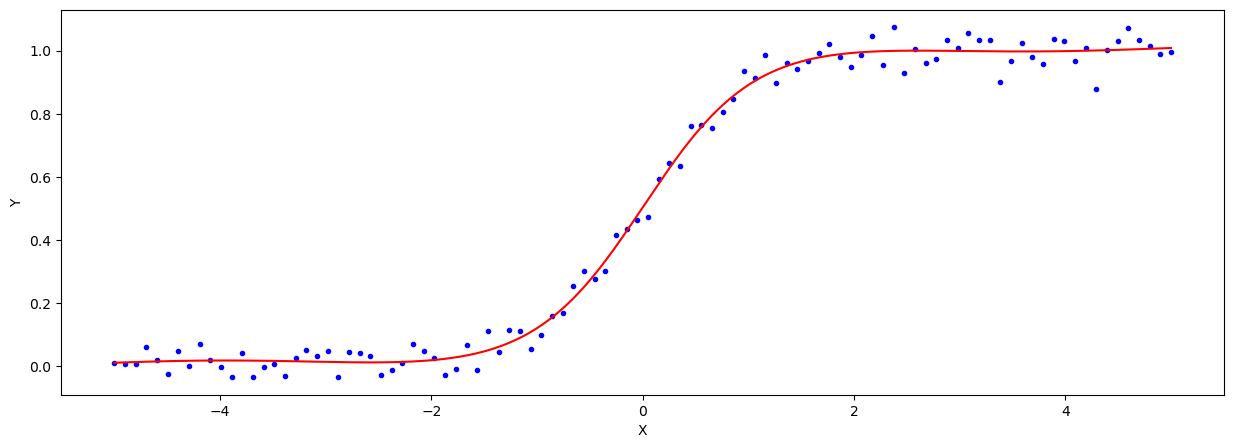

In [179]:
x_space = np.linspace(min(x),max(x),1000)
plt.plot(x, y, 'b.')
plt.plot(x_space, fit4(x_space, *popt), 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()